--> Regression <--

1. Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import numpy as np

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


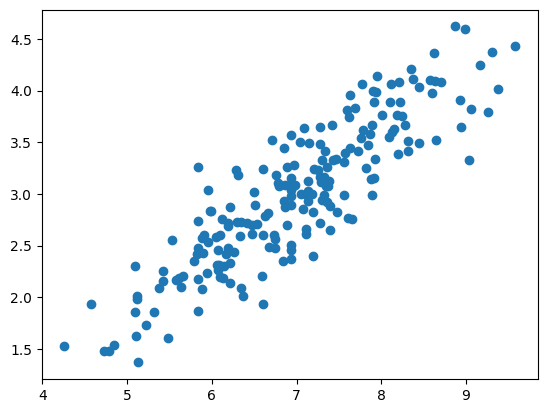

In [5]:
plt.scatter(df['cgpa'],df['package'])

In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [15]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package')

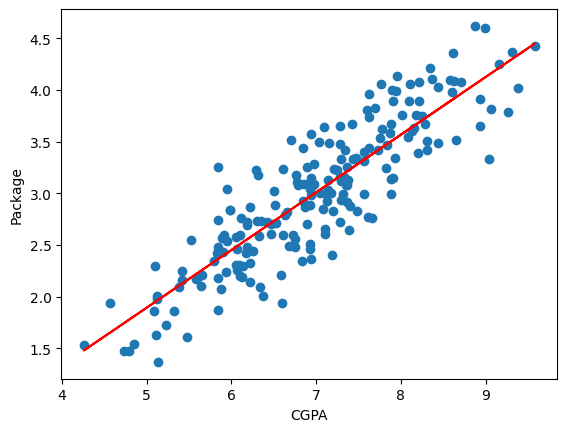

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [17]:
m = lr.coef_
m

array([0.55795197])

In [18]:
b = lr.intercept_
b

-0.8961119222429144

In [19]:
# y = mx + b

In [20]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [22]:
df.shape

(100, 3)

In [23]:
df.head()

,feature1,feature2,target
0,-1.597943,-0.745891,-207.218432
1,0.600633,-0.115717,46.395997
2,-1.353526,-0.173492,-168.521478
3,-0.542627,0.081706,-67.041139
4,1.673398,0.282364,108.558496


In [24]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("MAE" , mean_absolute_error(y_test,y_pred))
print("MSE" , mean_squared_error(y_test,y_pred))
print("R2 score" , r2_score(y_test,y_pred))

MAE 40.3881613827257
MSE 2727.556246888535
R2 score 0.8537419456453447


In [30]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

z = z_final

In [31]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [32]:
print("coefficient: " , lr.coef_)
print("intercept: " , lr.intercept_)

coefficient:  [83.70781015 58.49413633]
intercept:  -8.859864865378729


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [34]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

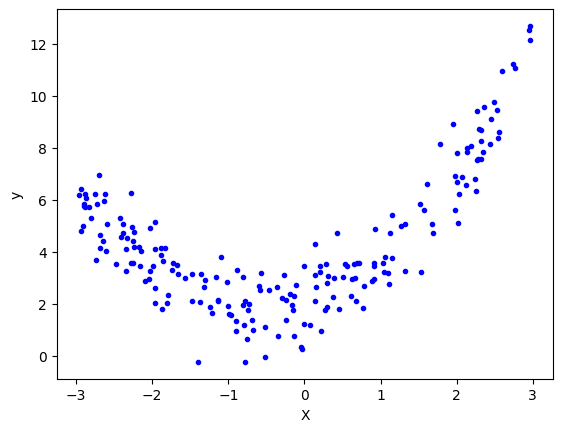

In [35]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


r2 score:  0.02012978280579425


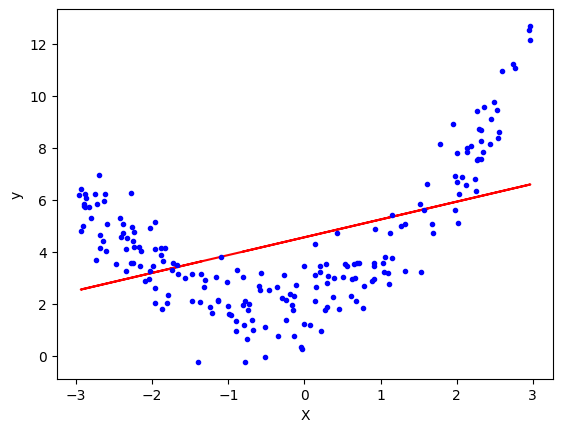

In [36]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("r2 score: " , r2_score(y_test,y_pred))
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

x_train[0]:  [-1.35704617]
X_train_trans[0] [ 1.         -1.35704617  1.8415743 ]
r2 score:  0.8177455235537324
coefficient:  [[0.         0.85842877 0.78223684]]
intercept:  [2.13602219]


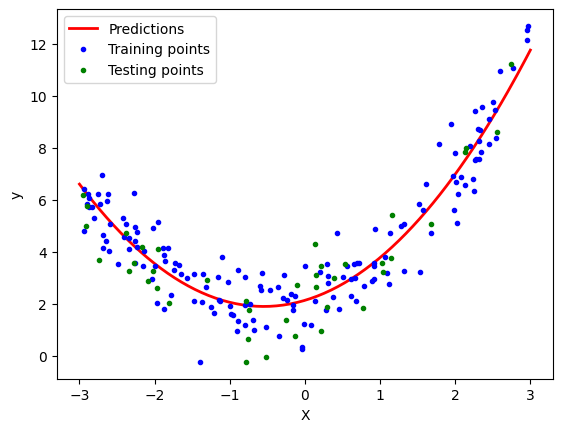

In [37]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print("x_train[0]: " , X_train[0])
print("X_train_trans[0]" , X_train_trans[0])

lr = LinearRegression()
lr.fit(X_train_trans,y_train)

y_pred = lr.predict(X_test_trans)
print("r2 score: " , r2_score(y_test,y_pred))

print("coefficient: " , lr.coef_)
print("intercept: " , lr.intercept_)

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Gradient Descent

In [38]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

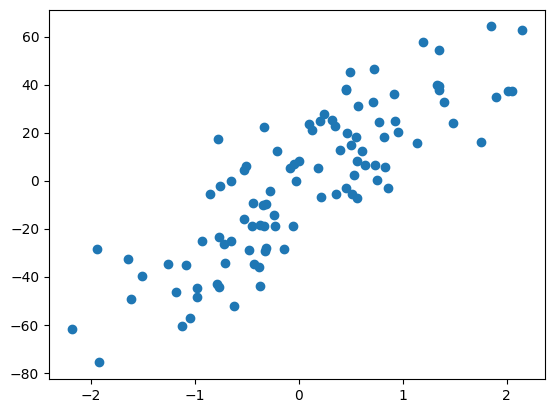

In [39]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [40]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))


fig.show()
fig.write_html("cost_function.html")

In [42]:
b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [43]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")


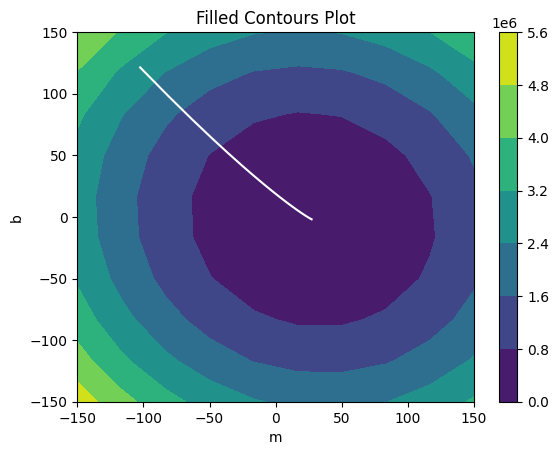

<Figure size 1800x400 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()


2. Logistic Regression

In [45]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)
import numpy as np
import matplotlib.pyplot as plt

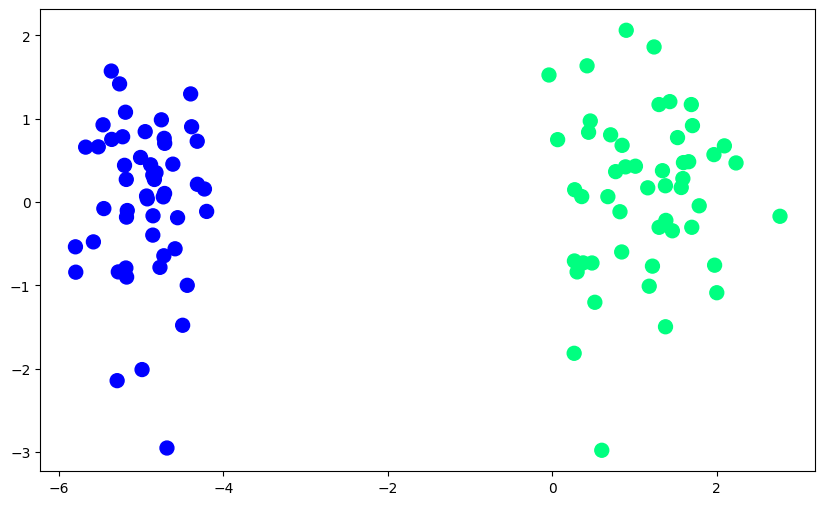

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

coefficient [1.1204053  0.40381514]
intercept 1.2000000000000002


(-3.0, 2.0)

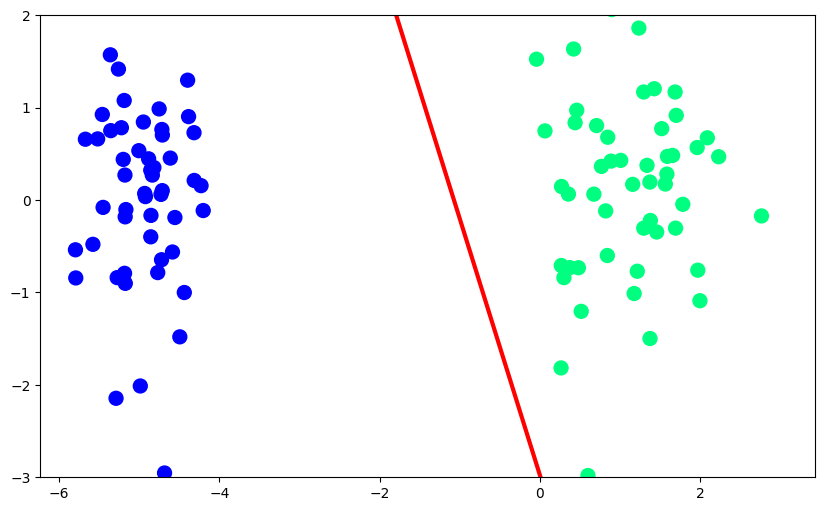

In [47]:
# Step Function :

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        
def step(z):
    return 1 if z>0 else 0

intercept_,coef_ = perceptron(X,y)

print("coefficient" , coef_)
print("intercept" , intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)

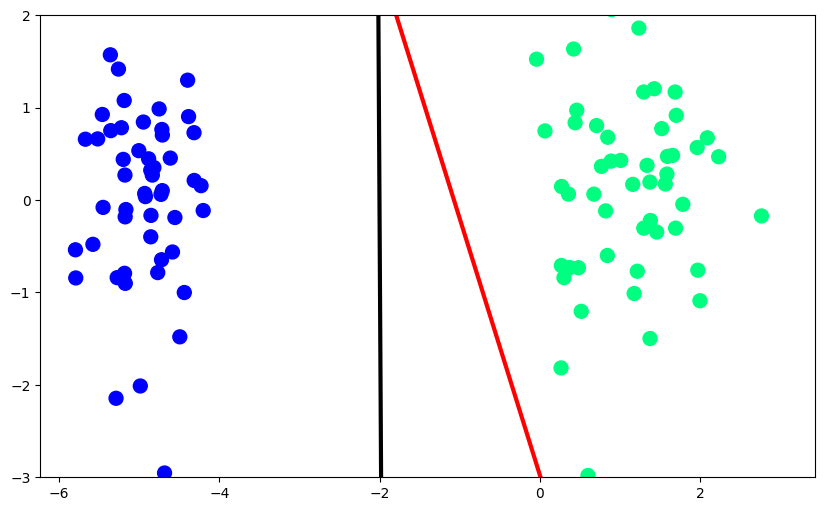

In [48]:
# Logistic Regression (sklearn)

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

coefficient [4.84835389 0.24534621]
intercept 8.341711101499218


(-3.0, 2.0)

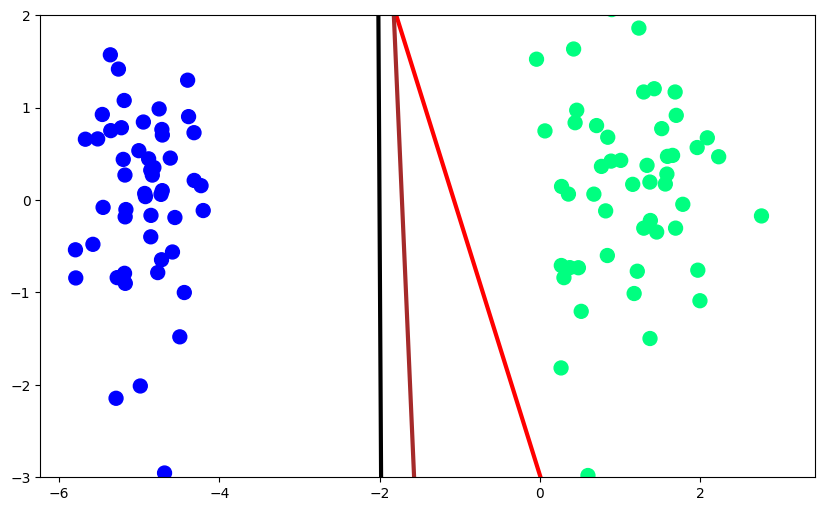

In [49]:
# Sigmoid Function

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

intercept_,coef_ = perceptron(X,y)

print("coefficient" , coef_)
print("intercept" , intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

3. Decision Tree

In [50]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
x = df.drop('quality',axis='columns')
y = df['quality']

In [52]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [53]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5875

In [56]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
df0 = df[df['species']=='setosa']
df1 = df[df['species']=='versicolor']
df2 = df[df['species']=='virginica']

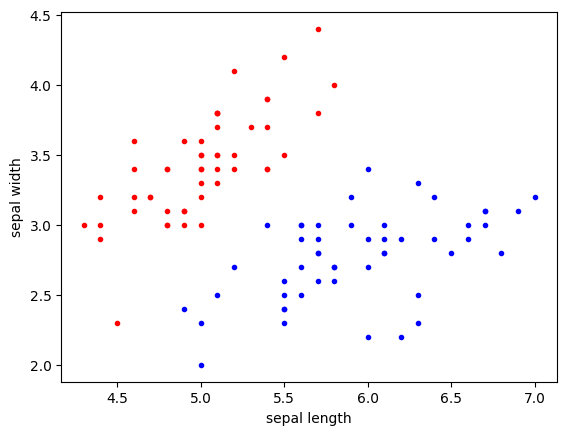

In [59]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal_length'],df0['sepal_width'],color='red',marker='.')
plt.scatter(df1['sepal_length'],df1['sepal_width'],color='blue',marker='.')

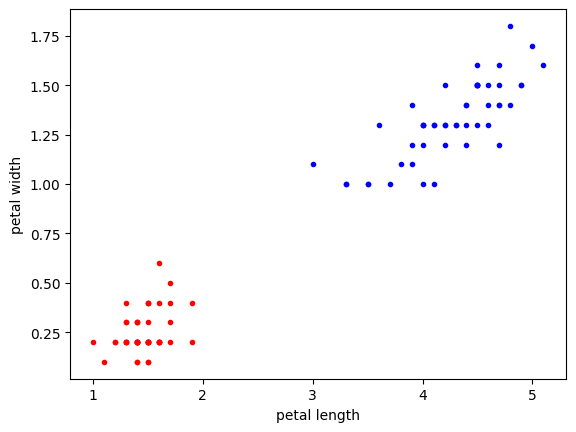

In [60]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal_length'],df0['petal_width'],color='red',marker='.')
plt.scatter(df1['petal_length'],df1['petal_width'],color='blue',marker='.')

In [61]:
from sklearn.model_selection import train_test_split
x = df.drop(['species'],axis='columns')
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [63]:
model.score(x_test,y_test)

0.9666666666666667

4. Random Forest

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

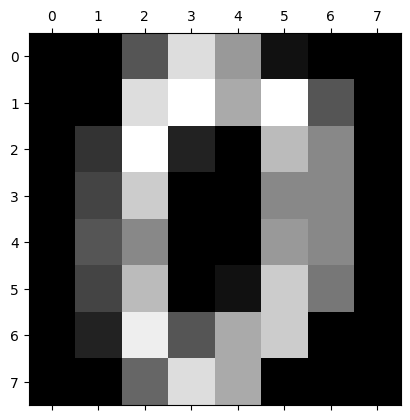

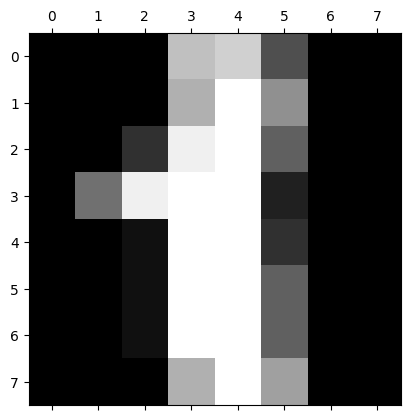

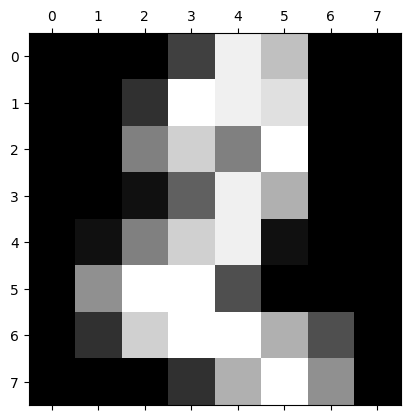

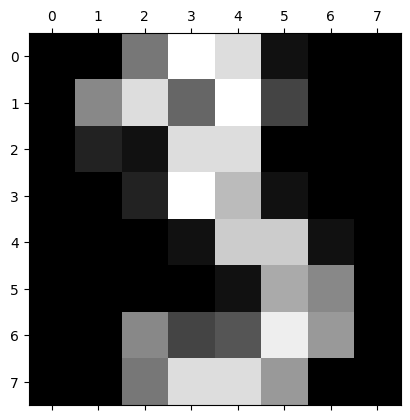

In [65]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [66]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [67]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [68]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [69]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'],axis='columns')
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
model.score(x_test,y_test)

0.9833333333333333

In [72]:
LinearRegression = LogisticRegression()
LinearRegression.fit(x_train,y_train)
LinearRegression.score(x_test,y_test)

c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9694444444444444

In [73]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9916666666666667

5. K-Means Clustering

In [74]:
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


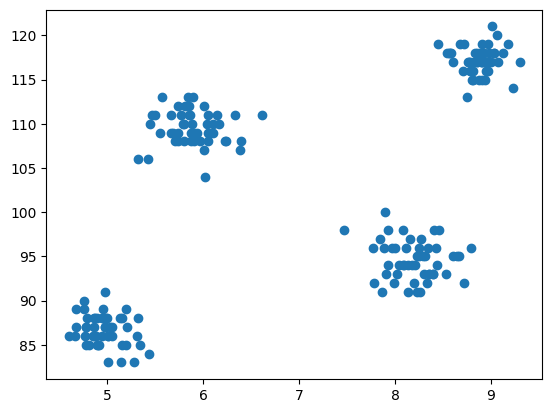

In [76]:
plt.scatter(df['cgpa'],df['iq'])

In [77]:
x = df.iloc[:,:]

In [78]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(x)
y_predicted

array([1, 0, 2, 2, 0, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 1, 1, 2, 1, 3, 2, 0, 3, 0, 3, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 1,
       3, 3, 2, 0, 3, 0, 1, 1, 3, 2, 3, 0, 0, 3, 0, 3, 0, 2, 2, 3, 1, 3,
       2, 1, 0, 2, 0, 3, 2, 1, 0, 3, 0, 3, 1, 2, 2, 3, 0, 1, 3, 1, 3, 0,
       3, 0, 3, 3, 2, 1, 2, 2, 3, 2, 1, 3, 0, 1, 1, 3, 1, 1, 2, 1, 3, 3,
       2, 3, 0, 0, 2, 3, 2, 0, 3, 1, 1, 0, 2, 3, 2, 1, 2, 0, 1, 2, 2, 0,
       1, 1, 0, 3, 0, 1, 2, 2, 2, 1, 0, 1, 1, 3, 1, 3, 0, 1, 3, 1, 3, 3,
       1, 2, 0, 3, 0, 2, 1, 3, 0, 2, 3, 1, 0, 1, 1, 3, 3, 0, 3, 1, 1, 2,
       3, 0, 1, 3, 3, 0, 0, 0, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 3, 0,
       0, 3])

In [79]:
df['cluter'] = y_predicted

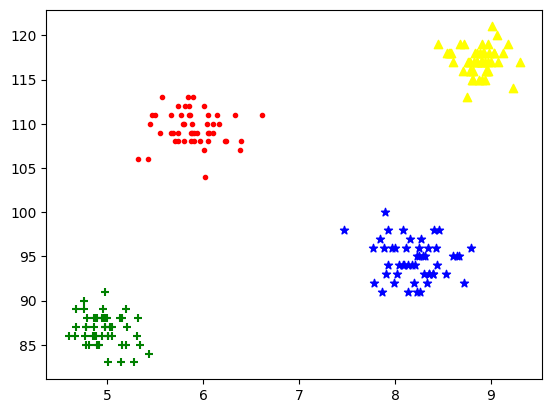

In [80]:
df1 = df[df.cluter==0]
df2 = df[df.cluter==1]
df3 = df[df.cluter==2]
df4 = df[df.cluter==3]

plt.scatter(df1['cgpa'],df1['iq'],color='red',marker='.')
plt.scatter(df2['cgpa'],df2['iq'],color='green',marker='+')
plt.scatter(df3['cgpa'],df3['iq'],color='blue',marker='*')
plt.scatter(df4['cgpa'],df4['iq'],color='yellow',marker='^')

6. Support Vector Machines (SVM)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [82]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace='True')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [84]:
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [86]:
df = df.loc[(df['EDUCATION']!=0)&(df['MARRIAGE']!=0)]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [87]:
df_no_default = df[df['DEFAULT']==0]
df_default = df[df['DEFAULT']==1]

In [88]:
x = df.drop('DEFAULT',axis=1).copy()
y = df['DEFAULT'].copy()

In [89]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [90]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [91]:
X = pd.get_dummies(x,columns=['SEX',
                              'EDUCATION',
                              'MARRIAGE',
                              'PAY_0',
                              'PAY_2',
                              'PAY_3',
                              'PAY_4',
                              'PAY_5',
                              'PAY_6'])
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = scale(X_train)
X_test = scale(X_test)

In [117]:
svm = SVC(random_state=42)
svm.fit(X_train,y_train)

SVC(random_state=42)

In [94]:
predictions = svm.predict(X_test)

In [95]:
cm = confusion_matrix(y_test, predictions)

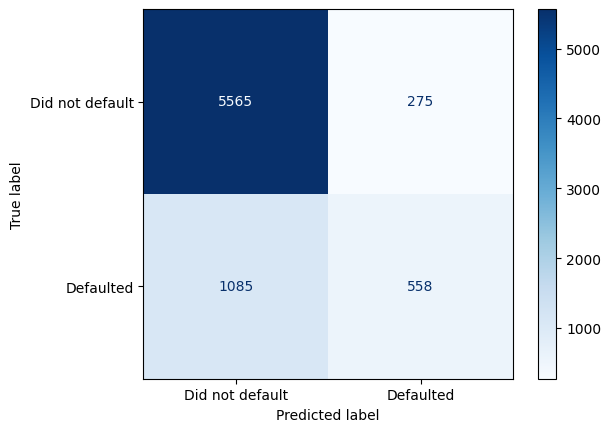

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                        display_labels=["Did not default", "Defaulted"])
disp.plot(cmap="Blues", values_format="")

In [97]:
param_grid = [
    {'C': [0.5,1,10,100],
     'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
     'kernel': ['rbf']}
]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
optimal_params.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [101]:
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [118]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(y_train, svm.predict(X_train))

In [120]:
print("Old Accuracy Score:",svm_accuracy)

Old Accuracy Score: 0.8301483362287853


In [122]:
import joblib
joblib.dump(svm,'model.pkl')

['model.pkl']